In [133]:
import pandas as pd


reddit = pd.read_csv("reddit_standardized.csv")


Data Information

In [134]:
reddit.info()
reddit.describe()
reddit.isna().sum()
reddit.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Platform             135 non-null    object 
 1   URL                  135 non-null    object 
 2   Engagement           135 non-null    int64  
 3   Text                 135 non-null    object 
 4   Matched Keywords     135 non-null    object 
 5   toxicity_score       135 non-null    float64
 6   Label                135 non-null    object 
 7   clean_text           135 non-null    object 
 8   word_count           135 non-null    int64  
 9   negative_word_count  135 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 10.7+ KB


np.int64(0)

Clean the missing data: if the text is empty, delete that row. For the other columns, don’t delete them — instead, fill them with either 0 or a logical value.

In [135]:
# Only drop rows if the Text itself is empty
reddit = reddit.dropna(subset=["Text"])

# Fill the remaining missing values with 0 or a logical value
reddit["Engagement"] = reddit["Engagement"].fillna(0)
reddit["toxicity_score"] = reddit["toxicity_score"].fillna(reddit["toxicity_score"].mean())
reddit["negative_word_count"] = reddit["negative_word_count"].fillna(0)
reddit["Label"] = reddit["Label"].fillna("Unknown")
reddit.head()


,Platform,URL,Engagement,Text,Matched Keywords,toxicity_score,Label,clean_text,word_count,negative_word_count
0,Reddit,https://www.reddit.com/r/law/comments/1nifvhk/...,52620,attorney general pam bondi there's free speech...,['hate speech'],0.178996,non-toxic,attorney general pam bondi there's free speech...,44,0
1,Reddit,https://www.reddit.com/r/PoliticalCompassMemes...,1308,we're bringing hate speech laws back baby,['hate speech'],0.297615,non-toxic,we're bringing hate speech laws back baby,7,0
2,Reddit,https://www.reddit.com/r/Conservative/comments...,1838,freedom of speech not freedom from consequence...,['hate speech'],0.001698,non-toxic,freedom of speech not freedom from consequence...,125,0
3,Reddit,https://www.reddit.com/r/Libertarian/comments/...,891,there is no such thing as hate speech,['hate speech'],0.007241,non-toxic,there is no such thing as hate speech,8,0
4,Reddit,https://www.reddit.com/r/AskConservatives/comm...,425,ag bondi there's free speech and then there's ...,['hate speech'],0.038068,non-toxic,ag bondi there's free speech and then there's ...,107,0


Remove duplicates

In [136]:
reddit = reddit.drop_duplicates(subset=["Text", "URL"])


We will clean the text and remove unwanted parts (links, strange symbols, extra spaces, mentions, or hashtags)


In [137]:
import re

def clean_text_func(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)          # Remove links
    text = re.sub(r"[@#]\w+", "", text)          # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)   # Remove special/strange characters
    text = re.sub(r"\s+", " ", text).strip()     # Remove extra spaces
    return text

reddit["clean_text"] = reddit["Text"].apply(clean_text_func)
reddit.head()

,Platform,URL,Engagement,Text,Matched Keywords,toxicity_score,Label,clean_text,word_count,negative_word_count
0,Reddit,https://www.reddit.com/r/law/comments/1nifvhk/...,52620,attorney general pam bondi there's free speech...,['hate speech'],0.178996,non-toxic,attorney general pam bondi theres free speech ...,44,0
1,Reddit,https://www.reddit.com/r/PoliticalCompassMemes...,1308,we're bringing hate speech laws back baby,['hate speech'],0.297615,non-toxic,were bringing hate speech laws back baby,7,0
2,Reddit,https://www.reddit.com/r/Conservative/comments...,1838,freedom of speech not freedom from consequence...,['hate speech'],0.001698,non-toxic,freedom of speech not freedom from consequence...,125,0
3,Reddit,https://www.reddit.com/r/Libertarian/comments/...,891,there is no such thing as hate speech,['hate speech'],0.007241,non-toxic,there is no such thing as hate speech,8,0
4,Reddit,https://www.reddit.com/r/AskConservatives/comm...,425,ag bondi there's free speech and then there's ...,['hate speech'],0.038068,non-toxic,ag bondi theres free speech and then theres ha...,107,0


Label Encoding  

Take into account the possibility of different words being used (Hate, hate speech, non-hate, neutral, unknown...).


In [138]:
# Encode Label column (toxic / non-toxic → 1 / 0)
reddit['Label'] = reddit['Label'].map({'toxic': 1, 'non-toxic': 0}).astype(int)

In [139]:
reddit["Label"] = reddit["Label"].replace({
    "Hate": 1, "hate": 1, "Hate Speech": 1,
    "Non-Hate": 0, "non hate": 0, "Not Hate": 0,
    "Neutral": 0, "Unknown": 0
})
reddit.head()

,Platform,URL,Engagement,Text,Matched Keywords,toxicity_score,Label,clean_text,word_count,negative_word_count
0,Reddit,https://www.reddit.com/r/law/comments/1nifvhk/...,52620,attorney general pam bondi there's free speech...,['hate speech'],0.178996,0,attorney general pam bondi theres free speech ...,44,0
1,Reddit,https://www.reddit.com/r/PoliticalCompassMemes...,1308,we're bringing hate speech laws back baby,['hate speech'],0.297615,0,were bringing hate speech laws back baby,7,0
2,Reddit,https://www.reddit.com/r/Conservative/comments...,1838,freedom of speech not freedom from consequence...,['hate speech'],0.001698,0,freedom of speech not freedom from consequence...,125,0
3,Reddit,https://www.reddit.com/r/Libertarian/comments/...,891,there is no such thing as hate speech,['hate speech'],0.007241,0,there is no such thing as hate speech,8,0
4,Reddit,https://www.reddit.com/r/AskConservatives/comm...,425,ag bondi there's free speech and then there's ...,['hate speech'],0.038068,0,ag bondi theres free speech and then theres ha...,107,0


Normalization of numeric values  

Only normalize the main numeric columns.  
Do not remove outliers, just rescale them between 0 and 1.  


In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["Engagement", "toxicity_score", "word_count", "negative_word_count"]
reddit[num_cols] = scaler.fit_transform(reddit[num_cols])


Filter texts by length  

 only remove posts where the word count is 0 or greater than 300.  


In [141]:
reddit = reddit[(reddit["word_count"] > 0) & (reddit["word_count"] < 300)]


Quick Summary

In [142]:
summary = {
    "final_shape": reddit.shape,
    "missing_values_after": reddit.isna().sum().to_dict(),
    "duplicates_after": reddit.duplicated(subset=["Text", "URL"]).sum(),
}
summary

reddit.to_csv("reddit_cleaned.csv", index=False)


EDA for Reddit Dataset

In [143]:
# ---------------------------------------------------
# 🧩 STEP 1: Import Libraries and Load the Data
# ---------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the cleaned data
df = pd.read_csv("reddit_cleaned.csv")

# Show the first 5 rows to confirm successful loading
print("🔹 First 5 rows:")
print(df.head())



🔹 First 5 rows:
  Platform                                                URL  Engagement  \
0   Reddit  https://www.reddit.com/r/law/comments/1nifvhk/...    0.413767   
1   Reddit  https://www.reddit.com/r/PoliticalCompassMemes...    0.009047   
2   Reddit  https://www.reddit.com/r/Conservative/comments...    0.013227   
3   Reddit  https://www.reddit.com/r/Libertarian/comments/...    0.005758   
4   Reddit  https://www.reddit.com/r/AskConservatives/comm...    0.002082   

                                                Text Matched Keywords  \
0  attorney general pam bondi there's free speech...  ['hate speech']   
1          we're bringing hate speech laws back baby  ['hate speech']   
2  freedom of speech not freedom from consequence...  ['hate speech']   
3              there is no such thing as hate speech  ['hate speech']   
4  ag bondi there's free speech and then there's ...  ['hate speech']   

   toxicity_score  Label                                         clean_text  \
0  

In [144]:
# ---------------------------------------------------
# 📊 STEP 2: Basic Overview (Getting to Know the Data)
# ---------------------------------------------------
print("\n📘 Dataset Info:")
df.info()

print("\n📏 Dataset Shape:", df.shape)
print("\n📋 Column Names:", list(df.columns))



📘 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Platform             134 non-null    object 
 1   URL                  134 non-null    object 
 2   Engagement           134 non-null    float64
 3   Text                 134 non-null    object 
 4   Matched Keywords     134 non-null    object 
 5   toxicity_score       134 non-null    float64
 6   Label                134 non-null    int64  
 7   clean_text           134 non-null    object 
 8   word_count           134 non-null    float64
 9   negative_word_count  134 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 10.6+ KB

📏 Dataset Shape: (134, 10)

📋 Column Names: ['Platform', 'URL', 'Engagement', 'Text', 'Matched Keywords', 'toxicity_score', 'Label', 'clean_text', 'word_count', 'negative_word_count']


In [145]:
# ---------------------------------------------------
# 📈 STEP 3: Descriptive Statistics (Non-Graphical Univariate EDA)
# ---------------------------------------------------
print("\n📊 Summary Statistics for Numerical Columns:")
print(df.describe())

print("\n📊 Value Counts for Label Column:")
print(df["Label"].value_counts())



📊 Summary Statistics for Numerical Columns:
       Engagement  toxicity_score       Label  word_count  negative_word_count
count  134.000000      134.000000  134.000000  134.000000                134.0
mean     0.098604        0.161223    0.111940    0.038674                  0.0
std      0.154670        0.267613    0.316476    0.115813                  0.0
min      0.000000        0.000000    0.000000    0.000257                  0.0
25%      0.010421        0.002526    0.000000    0.002315                  0.0
50%      0.040344        0.022597    0.000000    0.005530                  0.0
75%      0.122646        0.213764    0.000000    0.026299                  0.0
max      1.000000        1.000000    1.000000    1.000000                  0.0

📊 Value Counts for Label Column:
Label
0    119
1     15
Name: count, dtype: int64


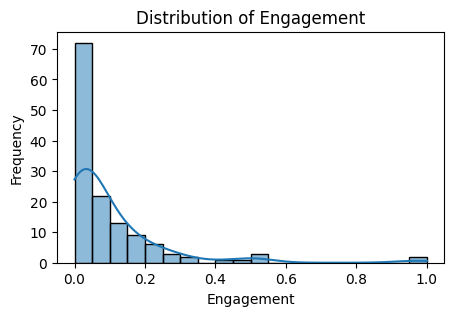

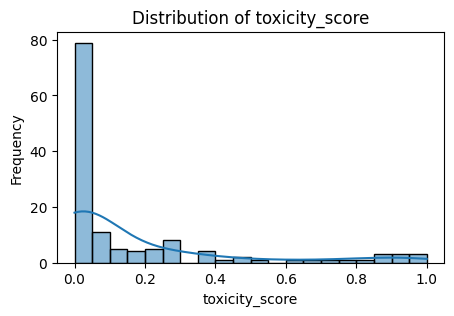

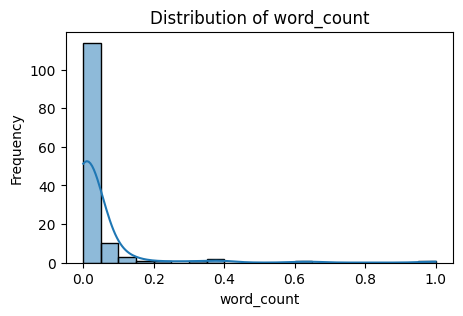

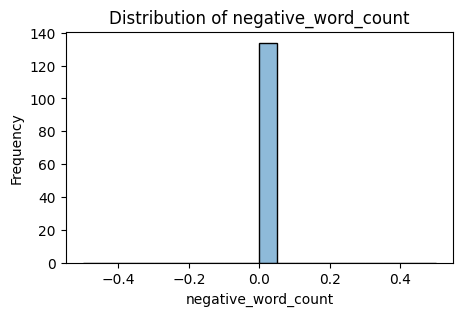

In [146]:
# ---------------------------------------------------
# 🎨 STEP 4: Visualize Numeric Distributions (Histograms)
# ---------------------------------------------------
numeric_cols = ["Engagement", "toxicity_score", "word_count", "negative_word_count"]

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


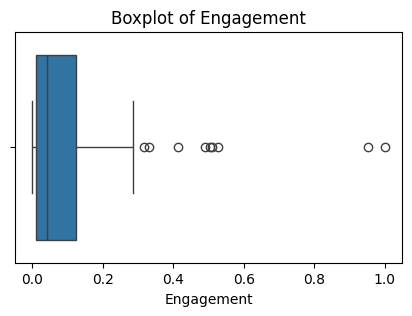

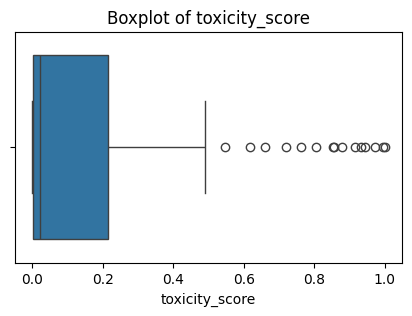

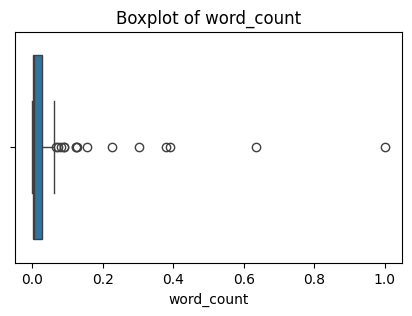

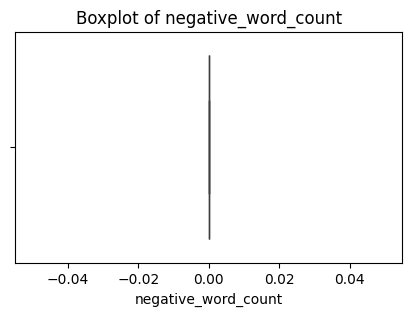

In [147]:
# ---------------------------------------------------
# 📦 STEP 5: Detect Outliers (Boxplots)
# ---------------------------------------------------
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


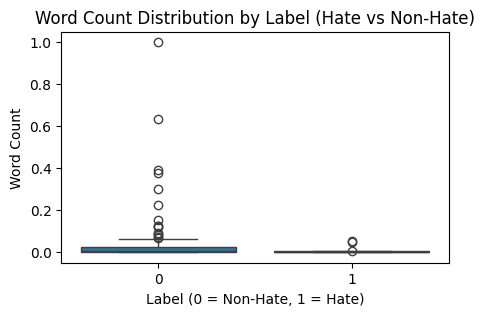

In [148]:
# ---------------------------------------------------
# ⚖️ STEP 6: Categorical vs Quantitative (Boxplot by Label)
# ---------------------------------------------------
plt.figure(figsize=(5,3))
sns.boxplot(x='Label', y='word_count', data=df)
plt.title("Word Count Distribution by Label (Hate vs Non-Hate)")
plt.xlabel("Label (0 = Non-Hate, 1 = Hate)")
plt.ylabel("Word Count")
plt.show()


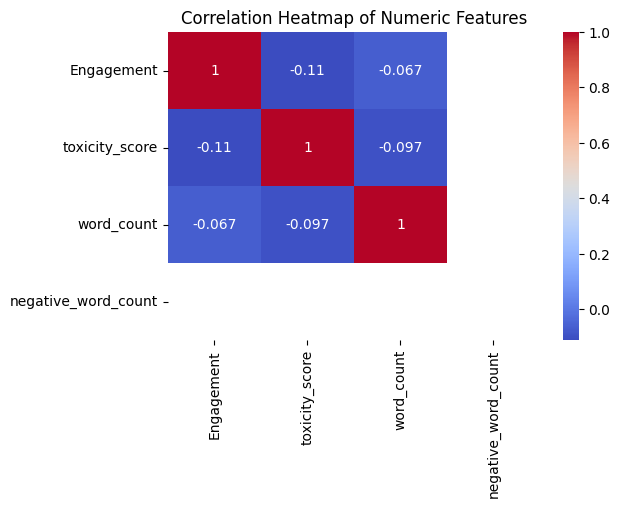

In [149]:
# ---------------------------------------------------
# 🔗 STEP 7: Correlation Analysis (Bivariate EDA)
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


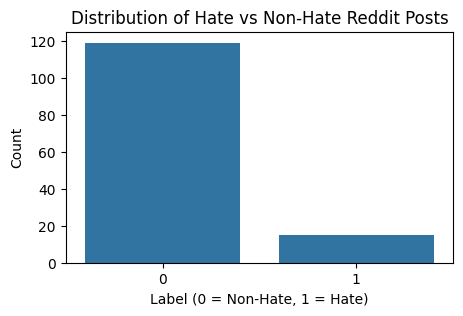

In [150]:
# ---------------------------------------------------
# 📊 STEP 8: Label Distribution Visualization
# ---------------------------------------------------
plt.figure(figsize=(5,3))
sns.countplot(x="Label", data=df)
plt.title("Distribution of Hate vs Non-Hate Reddit Posts")
plt.xlabel("Label (0 = Non-Hate, 1 = Hate)")
plt.ylabel("Count")
plt.show()
